In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joypy
from matplotlib import cm

from utils import joyplot

In [2]:
abcd_data = pd.read_csv('minimal_abcd.csv', index_col=0)
print(abcd_data.shape)
# DROP ISSUE 3 PEOPLE
SSD_bug = abcd_data.loc[((abcd_data['go_rt_adjusted'] < 50) & (abcd_data['go_rt_adjusted'] > 0) | ((abcd_data['stop_rt_adjusted'] < 50) & (abcd_data['stop_rt_adjusted'] > 0))) & (abcd_data['SSDDur'] <=50)]['NARGUID'].unique()
abcd_data = abcd_data.set_index('NARGUID').drop(SSD_bug).reset_index()


/Users/henrymj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2603160, 14)


In [3]:
SSDs = abcd_data.SSDDur.unique()
SSDs = [i for i in SSDs if i==i]
SSDs.sort()
RT_dist_dict = {ssd: [] for ssd in SSDs}
for ssd in SSDs:
    RT_dist_dict[ssd] = abcd_data.query(
        f"SSDDur == {ssd} and correct_stop==0.0"
    ).stop_rt_adjusted.values

go_RTs = abcd_data.query(
        f"trial_type == 'GoTrial' and correct_go_response in ['1.0', '0.0']"
    ).go_rt_adjusted.values

RT_dist_dict.update({-1:go_RTs})

In [7]:
max_RT = np.max([np.max(RT_dist_dict[key]) for key in RT_dist_dict])
bins = np.arange(0, max_RT, 5)
max_RT

2835.0

In [ ]:
prob_dict = {key: [] for key in RT_dist_dict}
between_bin_dict = {key: [] for key in RT_dist_dict}
for key in RT_dist_dict:
    print(key)
    ps, bins, _= plt.hist(RT_dist_dict[key], bins=bins, density=True)
    prob_dict[key] = ps
    between_bin_dict[key] = [np.mean([p1, p2]) for p1, p2 in zip(ps[:-1], ps[1:])]
    plt.show()
    plt.close()

In [5]:
RT_by_SSD_df = pd.DataFrame({ key:pd.Series(value) for key, value in RT_dist_dict.items()})
RT_by_SSD_df = RT_by_SSD_df.reindex(sorted(RT_by_SSD_df.columns), axis=1)


In [6]:
rt_by_SSD_melt = RT_by_SSD_df.melt(value_vars=RT_by_SSD_df.columns, var_name='SSD', value_name='RT')

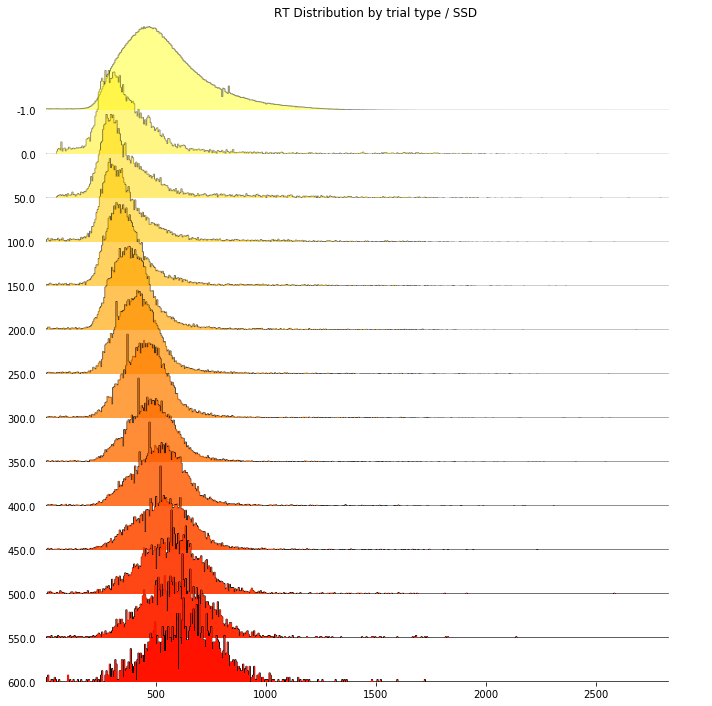

In [8]:
fig, axes = joyplot(rt_by_SSD_melt.query("SSD <= 600"), by="SSD", column="RT", range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(10,10),
                          title="RT Distribution by trial type / SSD",
                          bins=bins,
                          ylim='own',
                          colormap=cm.autumn_r,
                          hist=True,
                          density=True,
                          fade=True)

In [ ]:
counts, bins, _= plt.hist(RT_dist_dict[0.0], bins=bins, density=False, color=cm.autumn_r(19/20))
plt.show()
plt.close()
counts[np.where(bins==40)]

In [ ]:
counts, bins, _= plt.hist(RT_dist_dict[-1], bins=bins, density=False)
plt.close()
counts[np.where(bins==40)]

In [ ]:
def compare(p1, p2):
    out= False
    if np.allclose(p1,p2,.1):
        out = True
    if np.allclose(p1, 0, 0.00000002) or np.allclose(p2, 0, 0.00000002):
        out = False
    return out


shared_p_df = pd.DataFrame(index=prob_dict.keys(), columns=prob_dict.keys())
for key1 in prob_dict:
    across_comparisons = [True] * len(prob_dict[key1])
    for key2 in [key for key in prob_dict if key!=key1]:
        comparisons = [compare(p1,p2) for p1,p2 in zip(prob_dict[key1], prob_dict[key2])]
        shared_p_df.loc[key1, key2] = comparisons
        across_comparisons = [b1 and b2 for b1, b2 in zip(comparisons, across_comparisons)]
    print(key1, np.where(across_comparisons))

In [ ]:
shared_p_df = pd.DataFrame(index=between_bin_dict.keys(), columns=between_bin_dict.keys())
for key1 in between_bin_dict:
    across_comparisons = [True] * len(between_bin_dict[key1])
    for key2 in [key for key in between_bin_dict if key!=key1]:
        comparisons = [compare(p1,p2) for p1,p2 in zip(between_bin_dict[key1], between_bin_dict[key2])]
        shared_p_df.loc[key1, key2] = comparisons
        across_comparisons = [b1 and b2 for b1, b2 in zip(comparisons, across_comparisons)]
    print(key1, np.where(across_comparisons))

# Example of it 'working'

In [ ]:
shared_p_df = pd.DataFrame(index=between_bin_dict.keys(), columns=between_bin_dict.keys())
SSDS = [100.0, 150.0, 250.0, 300.0]
for key1 in SSDS:
    across_comparisons = [True] * len(between_bin_dict[key1])
    for key2 in [key for key in SSDS if key!=key1]:
        comparisons = [compare(p1,p2) for p1,p2 in zip(between_bin_dict[key1], between_bin_dict[key2])]
        shared_p_df.loc[key1, key2] = comparisons
        across_comparisons = [b1 and b2 for b1, b2 in zip(comparisons, across_comparisons)]
    print(key1, np.where(across_comparisons))

# compare choice acc at each SSD

In [ ]:
abcd_data = pd.read_csv('minimal_abcd.csv', index_col=0)
# DROP ISSUE 3 PEOPLE
SSD_bug = abcd_data.loc[((abcd_data['go_rt_adjusted'] < 50) & (abcd_data['go_rt_adjusted'] > 0) | ((abcd_data['stop_rt_adjusted'] < 50) & (abcd_data['stop_rt_adjusted'] > 0))) & (abcd_data['SSDDur'] <=50)]['NARGUID'].unique()
abcd_data = abcd_data.set_index('NARGUID').drop(SSD_bug).reset_index()


resp_replace = {'2.0': 2.0,
                '1.0': 1.0,
                '3.0': 3.0,
                '4.0': 4.0,
                '{LEFTARROW}': 1.0,
                '{RIGHTARROW}': 2.0}
#can I do this more succinctly? - I could do it in a function but this is pretty clear
#if you get an error it's because you've already ran it 
abcd_data['SSD.RESP'].replace(resp_replace, inplace=True)
abcd_data['StopSignal.RESP'].replace(resp_replace, inplace=True)
abcd_data['Fix.RESP'].replace(resp_replace, inplace=True)


#how can I make this neater... 
abcd_data['finger_press'] = np.NaN
abcd_data['finger_press'] = abcd_data['SSD.RESP'].combine_first(abcd_data['StopSignal.RESP'])
abcd_data['finger_press'] = abcd_data['finger_press'].combine_first(abcd_data['Fix.RESP'])
#check!! 
assert abcd_data.loc[(abcd_data['trial_type'] == 'StopTrial') & (abcd_data['correct_stop'] == 0)]['finger_press'].notnull().any()
# #now do the go trials, which don't ever have row-wise overlap with the stops
abcd_data['finger_press'] = abcd_data['finger_press'].combine_first(abcd_data['Go.RESP'])
abcd_data['finger_press'] = abcd_data['finger_press'].combine_first(abcd_data['Fix.RESP'])

abcd_data['finger_press'] = abcd_data['finger_press'].replace({1.0:4.0, 2.0: 3.0})
abcd_data['choice_accuracy'] = np.where(abcd_data['finger_press']==abcd_data['correct_stimulus_mapping_1'], 1.0, 0.0)

In [ ]:
abcd_data

In [ ]:
SSDs = abcd_data.SSDDur.unique()
SSDs = [i for i in SSDs if i==i and i <=550]
SSDs.sort()
acc_per_SSD = pd.DataFrame()
for ssd in SSDs:
    curr_means = abcd_data.query(
        f"SSDDur == {ssd} and correct_stop==0.0"
    ).groupby('NARGUID').mean()['choice_accuracy']
    curr_means.name = ssd
    acc_per_SSD = pd.concat([acc_per_SSD, curr_means], 1, sort=True)

go_accs = abcd_data.query(
        f"trial_type == 'GoTrial' and correct_go_response in ['1.0', '0.0']"
    ).groupby('NARGUID').mean()['choice_accuracy']
go_accs.name = -1
acc_per_SSD = pd.concat([acc_per_SSD, go_accs], 1, sort=True)



In [ ]:
acc_per_SSD.describe()

In [ ]:
acc_per_SSD_melt = acc_per_SSD.melt(value_vars=acc_per_SSD.columns, var_name='SSD', value_name='ACC')

In [ ]:
fig, axes = joypy.joyplot(acc_per_SSD_melt, by="SSD", column="ACC", range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(8,8),
                          title="ACC Distribution by trial type / SSD",
                          bins=bins,
                          ylim='own',
                          colormap=cm.autumn_r,
                          fade=True)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
sns.stripplot(x=acc_per_SSD_melt['SSD'].astype('float'), y=acc_per_SSD_melt['ACC'], ax=ax, size=2)



In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,9))

sns.boxplot(x=acc_per_SSD_melt['SSD'].astype('float'), y=acc_per_SSD_melt['ACC'],showmeans=True, ax=ax, fliersize=1 )

# Solve to get mixing distributions

In [ ]:
from sympy.solvers import solve
from sympy import Symbol

In [ ]:
acc_per_SSD.describe()

In [ ]:
acc_per_SSD.mean()[-1]

In [ ]:
p = Symbol('p')
guess_mean = acc_per_SSD.mean()[0.0]
go_mean = acc_per_SSD.mean()[-1]
for ssd in acc_per_SSD.columns:
    curr_mean = acc_per_SSD.mean()[ssd]
    solution = solve(p*guess_mean + (1-p)*go_mean - curr_mean, p)
    print(ssd, solution)